# Exploratory Data Analysis on Titanic Dataset 

2024/05/22 by Regina

### 1. Import the Required Libraries

###### Libraries and packages can be useful and crucial in utilizing python or data analysis to the best potential

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

We used two main packages in this assignment: pandas (imported as pd) and matplotlib (specifically pyplot, imported as plt). Pandas, one of the widely used package to aid in data analysis, were used in this assignment as it is extremely versatile and more on the user-friendly than the others. In addition, Matplotlib will enable us to visualize the analyses we made with the aid of Pandas.

We used the prefixes pd and plt for future convention.

### 2. Load the Dataset 

###### Datasets hold the information we are trying to make inquiries and analyses about

In [29]:
df = pd.read_csv('titanic.csv')

After importing the datasets, we have to load the dataset we're going to use, in this case our data is named **titanic**. The data is a csv, therefore we can use *pandas.read_csv* to read this data and turn it into a dataframe, readible by pandas, and enabling us to manipulate the data further.

### 3. Data Exploration

###### Before doing any cleaning or manipulation, a quick scanning on the data (the size, variables, data types, etc) will be a useful step to analyze the data better. 

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


First, we inquired the overall information about the data such as the total number of columns, number of observations, etc. This step was done using the *dataframe.info* function. From the result, we then knew that there are 12 columns, 891 rows/observations, and the data types for each column. We also discovered missing values in several columns such as **Age**, **Cabin**, and **Embarked**

From this, we decided to : 
- Replace null values in **Age** with either median or mean
- **Cabin** nor **Embarked** will not be manipulated as it holds no significance to the focus (does not matter which cabin)

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Next, we displayed the first few rows using *dataframe.head* to gain a general overview of the data itself. 

In [32]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Lastly, we asked pandas to describe the general statistics of the data. By using *dataframe.describe()* we were able to discover the mean, quartiles, std, etc. of columns containing numerical data. From this information, we know a few things: 
- The average (mean) survival rate is 38.4% 
- Most passengers are in the second tier 
- Statistically, there are possible outliers in the **Age** column as the mean is at 29.7, with std of 14.5 (+3std=+43.5), making the maximum 80 a possible outlier. However, in this assignment, outliers in the **Age** column will not be dropped as it is not the main problem we are analyzing in this assignment. 
- Same as **Age**, if we use the std to determine, there are possible outliers. However, we are not going to drop or replace the outliers as the fare prices in the titanic do range extremely wide.

### 4. Data Cleaning

###### Cleaning data including null values, duplicates, etc. to reduce any possible bias

1. Null Values

Text(0, 0.5, 'Freq')

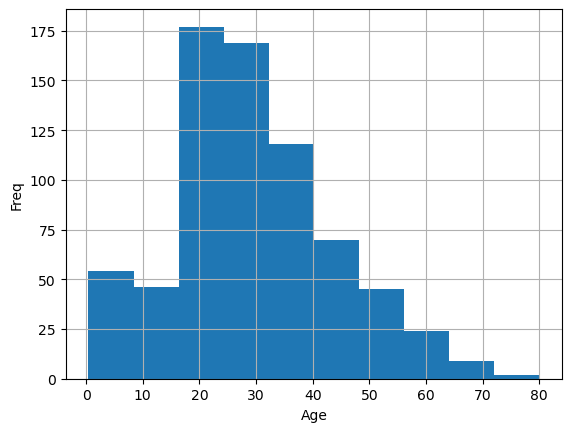

In [33]:
ddf = df[df['Age'].notna()]

ddf['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Freq')


As we wanted to replace the missing values and not drop them, we made a visualized the distribution of the age using matplotlib histogram. We first made a new dataframe without the null values, then visualized it in a simple manner. The chart showed that the distribution is in fact skewed and we concluded that median might be a better option than mean for the replacement.

In [34]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here there is 177 numerical null values in the **Age** column

In [37]:
df2 = df

df2['Age'] = df2['Age'].fillna(df['Age'].median())
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We first created a new dataframe named **df2** derived from **df** (we use a new dataframe to retain the original data, in case needed). We then replaced the numerical null values (which are all in the column **Age**) in the newly created dataframe with its median. To check wether the step is successful, we displayed the sum of null values again.

2. Duplicates

In [10]:
df2.duplicated().sum()

0

As it is not possible for someone to have the exact same information with another person, we wanted to remove any duplicates (observations are the same across the columns). However, there was none.

### 5. Data Analysis

1. Calculate and display the count of passengers by gender

In [11]:
df2.groupby('Sex').count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,314,314,314,314,314,314,314
male,577,577,577,577,577,577,577,577,577,577,577


There is 314 female and 577 male aboard the titanic ship according to this dataset.

2. Compute the average age of passengers

In [41]:
df2['Age'].mean().round(2)

29.36

As mentioned previously as well, the average age of the passengers in the titanic ship is 29.36 years old

3. Determine the survival rate by passenger class

In [42]:
df2[['Pclass','Survived']].groupby(['Pclass'], as_index = False).mean().sort_values('Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


From the numbers, we assume that the tier with the highest survival rate is Class 1. The number descends correlating to the class type as the lowest rate belongs to Class 3

### 6. Data Visualization

###### Visualizing the insights gain in the previous analyzing step

1. Create a bar chart to visualize the survival rate by class with the appropriate labels and title

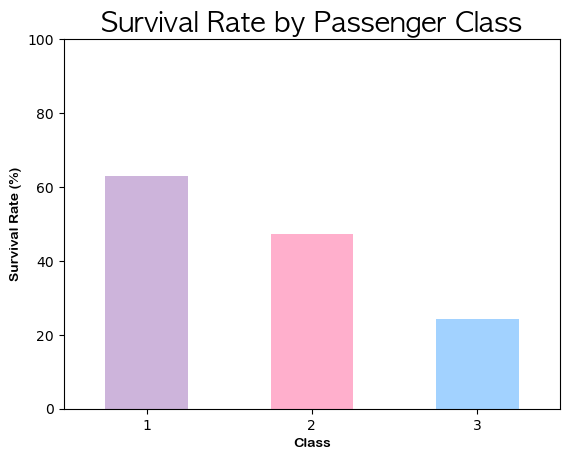

In [54]:
svrate = df2[['Pclass','Survived']].groupby(['Pclass'], as_index = False).mean().sort_values('Survived', ascending = False)
svrate['Survival_rate'] = svrate['Survived']*100
color = ['#cdb4db','#ffafcc','#a2d2ff']

svrate.plot.bar(x = 'Pclass', y = 'Survival_rate', color = color, legend = False)
plt.title('Survival Rate by Passenger Class',
          fontsize = 20, fontweight = 'bold', fontname = 'AppleGothic')
plt.xlabel('Class', fontname = 'Arial Rounded MT Bold')
plt.xticks(rotation=0)
plt.ylabel('Survival Rate (%)', fontname = 'Arial Rounded MT Bold')
plt.ylim(0,100)
plt.show()

A new dataframe named **svrate** was created where it holds values of the two columns **Pclass** and **Survived**, and grouped by the column **Pclass** (or in other words, the dataframe only contains two columns where it was grouped by Pclass). The grouped value shows the mean of each Pclass.

Afterwards, we created a new column name survival_rate where it multiplies the number by 100, resulting in a percentage (without the %). 

After having a simple dataframe focusing on survival rate, we then proceeded to visualize the data using plt specifically bar chart. The titles, labels, and other editings were done in the end. 

### 7. Conclusion

From the analysis done in this project, these insights are gained: First, the dataset had some missing values which we had replaced with the median of its column values. Secondly, by looking at the summary statistics there are some apparent outliers present. However, since those outliers lie mostly in age and fare, we can relate it has no significant impact as age and fares in the titanic range widely as passengers came from all age group and social group.

By grouping the passengers according to their gender, we know there is quite a difference in the number of males and females present. The number of males nearly doubled the number of females in this dataset. Finally, we can see that there is a difference in survival rate for each passenger class. According to the dataset, those who are in Class 1 have a higher chance of surviving at around 63%. As the class goes down, the survival rate consequently follows. Class 2 passengers have a 47% of surviving and Class 3 only have about 24% of surviving according to the dataset.

Analyzing data is important to gain insights, however, it is important to do some cleaning prior to analyzing and exploration to ensure that the data we are using are reliable and as accurate as possible. Whilst cleaning the data, we often come across some questions that could help us explore the data better too. Data exploration gives rise to curiosity in which we can use to gain answers in the analyzing process.